## Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import sys

In [2]:
scripts_path = os.path.abspath(os.path.join('..', 'scripts'))

# Add the scripts folder to Python's path
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

from validation_utils import check_column_consistency
from validation_utils import consolidate_data

## Consolidating and Loading Data

In [3]:
# Find all your pavement condition files
pavement_condition_pattern = "../data/raw/01_Pavement condition/Pavement_Condition_Data_*.csv"
pavement_condition_files = glob.glob(pavement_condition_pattern)

# Run the check
if check_column_consistency(pavement_condition_files):
    pavement_condition_master = consolidate_data(pavement_condition_files)


✅ All files have consistent columns.
✅ Successfully consolidated 3 files.


In [4]:
pavement_condition_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492066 entries, 0 to 492065
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       492066 non-null  int64  
 1   route_name                 492066 non-null  object 
 2   direction                  492066 non-null  object 
 3   district                   492066 non-null  object 
 4   begin_mile                 492066 non-null  float64
 5   end_mile                   492066 non-null  float64
 6   length                     492066 non-null  float64
 7   lane_miles                 492050 non-null  float64
 8   latitude                   492066 non-null  float64
 9   longitude                  492066 non-null  float64
 10  divided_undivided          492066 non-null  object 
 11  nhs                        492066 non-null  int64  
 12  nm_funct_class_name        492066 non-null  object 
 13  overal_condition_index     49

In [5]:
pavement_condition_master.head()

,year,route_name,direction,district,begin_mile,end_mile,length,lane_miles,latitude,longitude,divided_undivided,nhs,nm_funct_class_name,overal_condition_index,pavement_condition_rating,hpms_cracking_percentage,average_iri,nm_rutting_measure
0,2021,BL11M,M,DISTRICT 1 (DEMING),0.00,0.100,0.100,0.100,33.1134,-107.2995,Divided,1,PRINCIPAL ARTERIALS,40.0,47.29224,9.1,134.0,0.18
1,2021,BL11M,M,DISTRICT 1 (DEMING),0.10,0.125,0.025,0.025,33.1135,-107.2992,Divided,1,PRINCIPAL ARTERIALS,49.0,49.08284,16.7,219.0,0.26
2,2021,BL11M,M,DISTRICT 1 (DEMING),0.18,0.200,0.020,0.020,33.1141,-107.2980,Divided,1,PRINCIPAL ARTERIALS,85.0,78.77380,0.0,205.0,0.14
3,2021,BL11M,M,DISTRICT 1 (DEMING),0.20,0.300,0.100,0.100,33.1147,-107.2965,Divided,1,PRINCIPAL ARTERIALS,84.0,83.95596,0.3,111.0,0.19
4,2021,BL11M,M,DISTRICT 1 (DEMING),0.30,0.400,0.100,0.200,33.1154,-107.2950,Divided,1,PRINCIPAL ARTERIALS,86.0,86.76512,0.0,92.0,0.15


In [6]:
mms_pattern = "../data/raw/02_Maintenance/*MMS.xlsx"
mms_files = glob.glob(mms_pattern)

# Run the check
if mms_files:
    if check_column_consistency(mms_files):
        mms_master = consolidate_data(mms_files)

✅ All files have consistent columns.
✅ Successfully consolidated 3 files.


In [7]:
mms_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161468 entries, 0 to 161467
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fiscal_year          161468 non-null  int64         
 1   district             161468 non-null  int64         
 2   activity_name        161468 non-null  object        
 3   comment_work_order   127784 non-null  object        
 4   route_name           161468 non-null  object        
 5   eff_offset_from      161468 non-null  float64       
 6   eff_offset_from.1    161468 non-null  float64       
 7   amount               152995 non-null  float64       
 8   comment_location     105365 non-null  object        
 9   total_cost           161468 non-null  float64       
 10  start_date           161468 non-null  datetime64[ns]
 11  nm_nhs               161468 non-null  int64         
 12  nm_locale_code_name  161468 non-null  object        
 13  nm_funct_class

In [8]:
mms_master.head()

,fiscal_year,district,activity_name,comment_work_order,route_name,eff_offset_from,eff_offset_from.1,amount,comment_location,total_cost,start_date,nm_nhs,nm_locale_code_name,nm_funct_class_name,County
0,2022,1,100 EMERGENCY REPAIRS/CLEAN-UP,CALLED OUT BY LUNA COUNTY SHERIFF TO PICK UP E...,I10P,85.06,85.06,2.0,CALLED OUT,109.42,2022-01-01,1,Small Urban,INTERSTATE SYSTEM,Luna
1,2022,2,100 EMERGENCY REPAIRS/CLEAN-UP,Called out for stop signs down on 62-180 mm 36...,US62P,36.00,36.00,6.0,installed a stop sign,274.66,2022-01-01,1,Small Urban,PRINCIPAL ARTERIALS,Eddy
2,2022,1,100 EMERGENCY REPAIRS/CLEAN-UP,CALLED OUT DO TO SINGLE VEHICLE ROLLOVER ON US...,US380P,35.99,35.99,6.0,DO TO ROLL OVER,380.42,2022-01-01,0,Rural,MINOR ARTERIALS,Socorro
3,2022,2,100 EMERGENCY REPAIRS/CLEAN-UP,Called out for stop signs down on 62-180 mm 36...,US62P,39.00,39.00,6.0,installed a stop sign,274.66,2022-01-01,1,Rural,PRINCIPAL ARTERIALS,Eddy
4,2022,2,100 EMERGENCY REPAIRS/CLEAN-UP,called out for fence down on NM 128 mm 12 posi...,NM128P,12.30,12.30,8.0,fixed fence,368.79,2022-01-01,0,Rural,MAJOR COLLECTOR,Eddy


In [9]:
contract_data = pd.read_excel("../data/raw/02_Maintenance/2016-2023-ContractMaintenance.xlsx")
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FY                1159 non-null   int64         
 1   NHS               1159 non-null   bool          
 2   District          1159 non-null   int64         
 3   Process Type      1159 non-null   object        
 4   Route Type        1159 non-null   object        
 5   Route             1159 non-null   object        
 6   Beg MM            1157 non-null   float64       
 7   End MM            1157 non-null   float64       
 8   Total Lane Miles  450 non-null    float64       
 9   Cost              1159 non-null   float64       
 10  Comments          489 non-null    object        
 11  Entry Date        1159 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 100.9+ KB


In [10]:
contract_data.head()

,FY,NHS,District,Process Type,Route Type,Route,Beg MM,End MM,Total Lane Miles,Cost,Comments,Entry Date
0,2021,True,4,HOT INSITU RECYCLING,US,US 56,14.03,20.0,11.94,616417.03,NaN,2021-07-01
1,2021,True,4,CRACK SEAL,US,US 54,231.00,243.0,24.00,391181.76,NaN,2021-07-01
2,2021,True,4,CRACK SEAL,US,US 84,73.00,79.9,13.80,111440.06,NaN,2021-07-01
3,2021,True,4,BRIDGE OTHER,Interstate,I 40,252.00,252.0,NaN,29723.68,NaN,2021-07-01
4,2021,True,4,BRIDGE OTHER,US,US 54,324.90,326.3,NaN,54041.19,Logan Bridge,2021-07-01


In [11]:
roads_gdf = gpd.read_file("../data/raw/03_Shape Files/StateOwnedRoads28Aug2023.shp")
roads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RouteID     2229 non-null   object        
 1   FromMeasur  2229 non-null   float64       
 2   ToMeasure   2229 non-null   float64       
 3   Ownership   2229 non-null   int32         
 4   last_edi_1  2229 non-null   datetime64[ms]
 5   LocError    2229 non-null   object        
 6   geometry    2229 non-null   geometry      
dtypes: datetime64[ms](1), float64(2), geometry(1), int32(1), object(2)
memory usage: 113.3+ KB


/Users/seunshix/Desktop/Ph.D/Dr. Yanyu Wang/venv/lib/python3.11/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(


In [12]:
roads_gdf.head()

,RouteID,FromMeasur,ToMeasure,Ownership,last_edi_1,LocError,geometry
0,NMX423P001.1A,0.0,0.222965,1,2021-08-14,NO ERROR,"LINESTRING Z (347802.715 3894479.107 0, 347822..."
1,IX40P166.0G,0.0,0.204381,1,2021-08-14,NO ERROR,"LINESTRING Z (361876.076 3882493.467 0, 361882..."
2,US82M,0.0,0.183760,1,2021-08-14,NO ERROR,"LINESTRING Z (409575.925 3645386.517 0, 409626..."
3,NM136M,0.0,9.169912,1,2021-08-14,NO ERROR,"LINESTRING Z (340975.432 3517712.898 0, 340794..."
4,IX40P072.0T,0.0,0.220865,1,2021-08-14,NO ERROR,"LINESTRING Z (229315.522 3906154.65 0, 229314...."


In [13]:
counties_df = pd.read_excel("../data/raw/Counties.xlsx")
counties_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Route Group      2636 non-null   object 
 1   Route ID         2636 non-null   object 
 2   Route Number     2636 non-null   int64  
 3   From Measure     2636 non-null   float64
 4   To Measure       2636 non-null   float64
 5   County           2636 non-null   object 
 6   Route Direction  2636 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 144.3+ KB


In [14]:
counties_df.head()

,Route Group,Route ID,Route Number,From Measure,To Measure,County,Route Direction
0,BL,BL11M,11,0.0,5.747,Sierra,M
1,BL,BL11P,11,0.0,5.745,Sierra,P
2,BL,BL12M,12,0.0,2.857,Socorro,M
3,BL,BL12P,12,0.0,2.857,Socorro,P
4,BL,BL13M,13,0.0,6.616,Valencia,M


In [15]:
emergencies_df = pd.read_excel("../data/raw/Emergencies.xlsx")
emergencies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order.       580 non-null    object        
 1   Declared     580 non-null    datetime64[ns]
 2   YearE        580 non-null    int64         
 3   S/F          580 non-null    object        
 4   Origin       580 non-null    object        
 5   Incident     580 non-null    object        
 6   Declaration  580 non-null    object        
 7   County       580 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 36.4+ KB


In [16]:
emergencies_df.head()

,Order.,Declared,YearE,S/F,Origin,Incident,Declaration,County
0,1997-030,1997-10-08,1997,S,Johnson,"Disaster in the County of Socorro, as a result...",Flash Flooding,Socorro
1,1997-010,1997-05-14,1997,S,Johnson,Disaster for flooding in Rio Arriba County as ...,Flooding,Rio Arriba
2,1997-023,1997-08-18,1997,S,Johnson,Disaster in Mora County in resulting in heavy ...,Flooding,Mora
3,1997-032,1997-11-05,1997,S,Johnson,Disaster in the Pecos River in Guadalupe Count...,Flooding,Guadalupe
4,1997-033,1997-11-05,1997,S,Johnson,"Disaster in Grant County, as a result in flood...",Flooding,Grant


In [17]:
# --- Step 1: Create copies to avoid modifying the originals ---
contract_df = contract_data.copy()
mms_df = mms_master.copy()

# --- Step 2: Standardize essential columns ---
# Standardize contract_data
contract_df['segment_id'] = (
    contract_df['Route'].astype(str) + '_' + 
    contract_df['Beg MM'].astype(str) + '_' + 
    contract_df['End MM'].astype(str)
)
contract_df = contract_df.rename(columns={'Entry Date': 'date'})

# Standardize mms_data
mms_df['segment_id'] = (
    mms_df['route_name'].astype(str) + '_' + 
    mms_df['eff_offset_from'].astype(str) + '_' + 
    mms_df['eff_offset_from.1'].astype(str)
)
mms_df = mms_df.rename(columns={'start_date': 'date'})

# --- Step 3: Concatenate the tables ---
# This keeps all columns, filling non-matching ones with NaN
master_log = pd.concat([contract_df, mms_df], ignore_index=True)

# --- Step 4: Unify paired columns into single, standard columns ---
master_log['activity'] = master_log['Process Type'].fillna(master_log['activity_name'])
master_log['cost'] = master_log['Cost'].fillna(master_log['total_cost'])
master_log['fiscal_year'] = master_log['FY'].fillna(master_log['fiscal_year'])
master_log['district'] = master_log['District'].fillna(master_log['district'])
master_log['nhs'] = master_log['NHS'].fillna(master_log['nm_nhs'])

# --- Step 5: Select the final columns for the clean dataset ---
final_columns = [
    'segment_id',
    'date',
    'fiscal_year',
    'district',
    'County',
    'nhs',
    'nm_funct_class_name',
    'activity',
    'cost',
    'Total Lane Miles'
]
maintenance_data = master_log[final_columns].copy()

# --- Step 6: Final data type cleanup ---
maintenance_data['nhs'] = maintenance_data['nhs'].astype(int)

# --- Step 7: Verify the final result ---
print("--- Final Clean 'maintenance_data' Created ---")
maintenance_data.info()

--- Final Clean 'maintenance_data' Created ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162627 entries, 0 to 162626
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   segment_id           162627 non-null  object        
 1   date                 162627 non-null  datetime64[ns]
 2   fiscal_year          162627 non-null  float64       
 3   district             162627 non-null  float64       
 4   County               161468 non-null  object        
 5   nhs                  162627 non-null  int64         
 6   nm_funct_class_name  161468 non-null  object        
 7   activity             162627 non-null  object        
 8   cost                 162627 non-null  float64       
 9   Total Lane Miles     450 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 12.4+ MB


In [18]:
maintenance_data.head()

,segment_id,date,fiscal_year,district,County,nhs,nm_funct_class_name,activity,cost,Total Lane Miles
0,US 56_14.03_20.0,2021-07-01,2021.0,4.0,NaN,1,NaN,HOT INSITU RECYCLING,616417.03,11.94
1,US 54_231.0_243.0,2021-07-01,2021.0,4.0,NaN,1,NaN,CRACK SEAL,391181.76,24.00
2,US 84_73.0_79.9,2021-07-01,2021.0,4.0,NaN,1,NaN,CRACK SEAL,111440.06,13.80
3,I 40_252.0_252.0,2021-07-01,2021.0,4.0,NaN,1,NaN,BRIDGE OTHER,29723.68,NaN
4,US 54_324.9_326.3,2021-07-01,2021.0,4.0,NaN,1,NaN,BRIDGE OTHER,54041.19,NaN


## Cleaning Pavement Data

In [19]:
pavement_data_cleaned = pavement_condition_master.copy()
pavement_data_cleaned['district'] = pavement_data_cleaned['district'].str.extract(r'(\d+)').astype(int)

pavement_data_cleaned['segment_id'] = (
    pavement_data_cleaned['route_name'].astype(str) + '_' +
    pavement_data_cleaned['begin_mile'].astype(str) + '_' +
    pavement_data_cleaned['end_mile'].astype(str)
)

pavement_data_cleaned.dropna(
    subset=['average_iri', 'pavement_condition_rating', 'nm_rutting_measure', 'lane_miles'],
    inplace=True
)

output_filename = '../data/processed/cleaned/pavement_condition_cleaned.csv'
pavement_data_cleaned.to_csv(output_filename, index=False)

print(f"✅ Cleaned pavement data saved to '{output_filename}'")

✅ Cleaned pavement data saved to '../data/processed/cleaned/pavement_condition_cleaned.csv'


In [20]:
pavement_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486205 entries, 0 to 492065
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       486205 non-null  int64  
 1   route_name                 486205 non-null  object 
 2   direction                  486205 non-null  object 
 3   district                   486205 non-null  int64  
 4   begin_mile                 486205 non-null  float64
 5   end_mile                   486205 non-null  float64
 6   length                     486205 non-null  float64
 7   lane_miles                 486205 non-null  float64
 8   latitude                   486205 non-null  float64
 9   longitude                  486205 non-null  float64
 10  divided_undivided          486205 non-null  object 
 11  nhs                        486205 non-null  int64  
 12  nm_funct_class_name        486205 non-null  object 
 13  overal_condition_index     486205 

In [21]:
pavement_data_cleaned.head()

,year,route_name,direction,district,begin_mile,end_mile,length,lane_miles,latitude,longitude,divided_undivided,nhs,nm_funct_class_name,overal_condition_index,pavement_condition_rating,hpms_cracking_percentage,average_iri,nm_rutting_measure,segment_id
0,2021,BL11M,M,1,0.00,0.100,0.100,0.100,33.1134,-107.2995,Divided,1,PRINCIPAL ARTERIALS,40.0,47.29224,9.1,134.0,0.18,BL11M_0.0_0.1
1,2021,BL11M,M,1,0.10,0.125,0.025,0.025,33.1135,-107.2992,Divided,1,PRINCIPAL ARTERIALS,49.0,49.08284,16.7,219.0,0.26,BL11M_0.1_0.125
2,2021,BL11M,M,1,0.18,0.200,0.020,0.020,33.1141,-107.2980,Divided,1,PRINCIPAL ARTERIALS,85.0,78.77380,0.0,205.0,0.14,BL11M_0.18_0.2
3,2021,BL11M,M,1,0.20,0.300,0.100,0.100,33.1147,-107.2965,Divided,1,PRINCIPAL ARTERIALS,84.0,83.95596,0.3,111.0,0.19,BL11M_0.2_0.3
4,2021,BL11M,M,1,0.30,0.400,0.100,0.200,33.1154,-107.2950,Divided,1,PRINCIPAL ARTERIALS,86.0,86.76512,0.0,92.0,0.15,BL11M_0.3_0.4


In [22]:
# Create a copy to work on
mms_cleaned = mms_master.copy()

# Create the standard segment_id
mms_cleaned['segment_id'] = (
    mms_cleaned['route_name'].astype(str) + '_' + 
    mms_cleaned['eff_offset_from'].astype(str) + '_' + 
    mms_cleaned['eff_offset_from.1'].astype(str)
)

# Rename key columns to a standard format
mms_cleaned = mms_cleaned.rename(columns={
    'start_date': 'date',
    'activity_name': 'activity',
    'total_cost': 'cost',
    'nm_nhs': 'nhs'
})

mms_cleaned.dropna(
    subset=['comment_work_order', 'amount', 'comment_location'],
    inplace=True
)

# Save the cleaned DataFrame
mms_cleaned.to_csv('../data/processed/cleaned/mms_cleaned.csv', index=False)
print("✅ Cleaned MMS data saved to 'mms_cleaned.csv'")

✅ Cleaned MMS data saved to 'mms_cleaned.csv'


In [23]:
mms_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87433 entries, 0 to 161459
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fiscal_year          87433 non-null  int64         
 1   district             87433 non-null  int64         
 2   activity             87433 non-null  object        
 3   comment_work_order   87433 non-null  object        
 4   route_name           87433 non-null  object        
 5   eff_offset_from      87433 non-null  float64       
 6   eff_offset_from.1    87433 non-null  float64       
 7   amount               87433 non-null  float64       
 8   comment_location     87433 non-null  object        
 9   cost                 87433 non-null  float64       
 10  date                 87433 non-null  datetime64[ns]
 11  nhs                  87433 non-null  int64         
 12  nm_locale_code_name  87433 non-null  object        
 13  nm_funct_class_name  87433 non-null

In [24]:
mms_cleaned.head()

,fiscal_year,district,activity,comment_work_order,route_name,eff_offset_from,eff_offset_from.1,amount,comment_location,cost,date,nhs,nm_locale_code_name,nm_funct_class_name,County,segment_id
0,2022,1,100 EMERGENCY REPAIRS/CLEAN-UP,CALLED OUT BY LUNA COUNTY SHERIFF TO PICK UP E...,I10P,85.06,85.06,2.0,CALLED OUT,109.42,2022-01-01,1,Small Urban,INTERSTATE SYSTEM,Luna,I10P_85.06_85.06
1,2022,2,100 EMERGENCY REPAIRS/CLEAN-UP,Called out for stop signs down on 62-180 mm 36...,US62P,36.00,36.00,6.0,installed a stop sign,274.66,2022-01-01,1,Small Urban,PRINCIPAL ARTERIALS,Eddy,US62P_36.0_36.0
2,2022,1,100 EMERGENCY REPAIRS/CLEAN-UP,CALLED OUT DO TO SINGLE VEHICLE ROLLOVER ON US...,US380P,35.99,35.99,6.0,DO TO ROLL OVER,380.42,2022-01-01,0,Rural,MINOR ARTERIALS,Socorro,US380P_35.99_35.99
3,2022,2,100 EMERGENCY REPAIRS/CLEAN-UP,Called out for stop signs down on 62-180 mm 36...,US62P,39.00,39.00,6.0,installed a stop sign,274.66,2022-01-01,1,Rural,PRINCIPAL ARTERIALS,Eddy,US62P_39.0_39.0
4,2022,2,100 EMERGENCY REPAIRS/CLEAN-UP,called out for fence down on NM 128 mm 12 posi...,NM128P,12.30,12.30,8.0,fixed fence,368.79,2022-01-01,0,Rural,MAJOR COLLECTOR,Eddy,NM128P_12.3_12.3


In [25]:
# Create a copy
contract_cleaned = contract_data.copy()

# Create the standard segment_id
contract_cleaned['segment_id'] = (
    contract_cleaned['Route'].astype(str) + '_' + 
    contract_cleaned['Beg MM'].astype(str) + '_' + 
    contract_cleaned['End MM'].astype(str)
)

# Rename key columns to the standard format
contract_cleaned = contract_cleaned.rename(columns={
    'Entry Date': 'date',
    'Process Type': 'activity',
    'Cost': 'cost',
    'FY': 'fiscal_year',
    'District': 'district'
    # 'NHS' already has a good name
})
# Drop the specified columns
contract_cleaned.drop(columns=['Total Lane Miles', 'Comments'], inplace=True)
contract_cleaned.dropna(subset=['Beg MM', 'End MM'], inplace=True)
# Save the cleaned DataFrame
contract_cleaned.to_csv('../data/processed/cleaned/contract_cleaned.csv', index=False)
print("✅ Cleaned contract data saved to 'contract_cleaned.csv'")

✅ Cleaned contract data saved to 'contract_cleaned.csv'


In [26]:
contract_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 0 to 1158
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fiscal_year  1157 non-null   int64         
 1   NHS          1157 non-null   bool          
 2   district     1157 non-null   int64         
 3   activity     1157 non-null   object        
 4   Route Type   1157 non-null   object        
 5   Route        1157 non-null   object        
 6   Beg MM       1157 non-null   float64       
 7   End MM       1157 non-null   float64       
 8   cost         1157 non-null   float64       
 9   date         1157 non-null   datetime64[ns]
 10  segment_id   1157 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 100.6+ KB


In [27]:
contract_cleaned.head()

,fiscal_year,NHS,district,activity,Route Type,Route,Beg MM,End MM,cost,date,segment_id
0,2021,True,4,HOT INSITU RECYCLING,US,US 56,14.03,20.0,616417.03,2021-07-01,US 56_14.03_20.0
1,2021,True,4,CRACK SEAL,US,US 54,231.00,243.0,391181.76,2021-07-01,US 54_231.0_243.0
2,2021,True,4,CRACK SEAL,US,US 84,73.00,79.9,111440.06,2021-07-01,US 84_73.0_79.9
3,2021,True,4,BRIDGE OTHER,Interstate,I 40,252.00,252.0,29723.68,2021-07-01,I 40_252.0_252.0
4,2021,True,4,BRIDGE OTHER,US,US 54,324.90,326.3,54041.19,2021-07-01,US 54_324.9_326.3


In [ ]:
# Create a copy to work on
roads_cleaned_gdf = roads_gdf.copy()

# Create the standard segment_id, trimming whitespace and formatting numbers
roads_cleaned_gdf['segment_id'] = (
    roads_cleaned_gdf['RouteID'].str.strip() + '_' +
    roads_cleaned_gdf['FromMeasur'].map('{:.3f}'.format) + '_' +
    roads_cleaned_gdf['ToMeasure'].map('{:.3f}'.format)
)

# Drop the original columns used to create the ID
roads_cleaned_gdf.drop(
    columns=['RouteID', 'FromMeasur', 'ToMeasure'], 
    inplace=True
)

# Save the cleaned GeoDataFrame to a GeoPackage file
# GeoPackage is a modern format for storing geographic data in a single file
output_filename = '../data/processed/cleaned/roads_cleaned.gpkg'
roads_cleaned_gdf.to_file(output_filename, driver='GPKG')

print(f"✅ Cleaned roads data saved to '{output_filename}'")

✅ Cleaned roads data saved to 'roads_cleaned.gpkg'


In [29]:
roads_cleaned_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ownership   2229 non-null   int32         
 1   last_edi_1  2229 non-null   datetime64[ms]
 2   LocError    2229 non-null   object        
 3   geometry    2229 non-null   geometry      
 4   segment_id  2229 non-null   object        
dtypes: datetime64[ms](1), geometry(1), int32(1), object(2)
memory usage: 78.5+ KB


In [30]:
roads_cleaned_gdf.head()

,Ownership,last_edi_1,LocError,geometry,segment_id
0,1,2021-08-14,NO ERROR,"LINESTRING Z (347802.715 3894479.107 0, 347822...",NMX423P001.1A_0.000_0.223
1,1,2021-08-14,NO ERROR,"LINESTRING Z (361876.076 3882493.467 0, 361882...",IX40P166.0G_0.000_0.204
2,1,2021-08-14,NO ERROR,"LINESTRING Z (409575.925 3645386.517 0, 409626...",US82M_0.000_0.184
3,1,2021-08-14,NO ERROR,"LINESTRING Z (340975.432 3517712.898 0, 340794...",NM136M_0.000_9.170
4,1,2021-08-14,NO ERROR,"LINESTRING Z (229315.522 3906154.65 0, 229314....",IX40P072.0T_0.000_0.221


In [ ]:
# Create a copy to work on
emergencies_cleaned = emergencies_df.copy()

# Define the new, clearer column names
new_column_names = {
    'Order.': 'order_id',
    'Declared': 'date_declared',
    'YearE': 'year',
    'S/F': 'state_federal_code',
    'Origin': 'origin_office',
    'Incident': 'incident_description',
    'Declaration': 'declaration_type',
    'County': 'county'
}

# Rename the columns
emergencies_cleaned.rename(columns=new_column_names, inplace=True)

# Save the cleaned DataFrame
emergencies_cleaned.to_csv('../data/processed/cleaned/emergencies_cleaned.csv', index=False)

print("✅ Cleaned emergencies data saved to 'emergencies_cleaned.csv'")


✅ Cleaned emergencies data saved to 'emergencies_cleaned.csv'


In [32]:
emergencies_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              580 non-null    object        
 1   date_declared         580 non-null    datetime64[ns]
 2   year                  580 non-null    int64         
 3   state_federal_code    580 non-null    object        
 4   origin_office         580 non-null    object        
 5   incident_description  580 non-null    object        
 6   declaration_type      580 non-null    object        
 7   county                580 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 36.4+ KB


In [33]:
emergencies_cleaned.head()

,order_id,date_declared,year,state_federal_code,origin_office,incident_description,declaration_type,county
0,1997-030,1997-10-08,1997,S,Johnson,"Disaster in the County of Socorro, as a result...",Flash Flooding,Socorro
1,1997-010,1997-05-14,1997,S,Johnson,Disaster for flooding in Rio Arriba County as ...,Flooding,Rio Arriba
2,1997-023,1997-08-18,1997,S,Johnson,Disaster in Mora County in resulting in heavy ...,Flooding,Mora
3,1997-032,1997-11-05,1997,S,Johnson,Disaster in the Pecos River in Guadalupe Count...,Flooding,Guadalupe
4,1997-033,1997-11-05,1997,S,Johnson,"Disaster in Grant County, as a result in flood...",Flooding,Grant


In [34]:
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Route Group      2636 non-null   object 
 1   Route ID         2636 non-null   object 
 2   Route Number     2636 non-null   int64  
 3   From Measure     2636 non-null   float64
 4   To Measure       2636 non-null   float64
 5   County           2636 non-null   object 
 6   Route Direction  2636 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 144.3+ KB


In [ ]:
# Create a copy to work on
counties_cleaned = counties_df.copy()

# --- Step 1: Rename columns to remove spaces ---
counties_cleaned.columns = [col.replace(' ', '_').lower() for col in counties_cleaned.columns]

# --- Step 2: Create the standard segment_id ---
counties_cleaned['segment_id'] = (
    counties_cleaned['route_id'].str.strip() + '_' +
    counties_cleaned['from_measure'].map('{:.3f}'.format) + '_' +
    counties_cleaned['to_measure'].map('{:.3f}'.format)
)

# --- Step 3: Select only the necessary columns for our lookup table ---
counties_cleaned = counties_cleaned[['segment_id', 'county']]

# --- Step 4: Save the cleaned DataFrame ---
counties_cleaned.to_csv('../data/processed/cleaned/counties_cleaned.csv', index=False)

print("✅ Cleaned counties data saved to 'counties_cleaned.csv'")
counties_cleaned.info()

✅ Cleaned counties data saved to 'counties_cleaned.csv'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   segment_id  2636 non-null   object
 1   county      2636 non-null   object
dtypes: object(2)
memory usage: 41.3+ KB


In [36]:
counties_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   segment_id  2636 non-null   object
 1   county      2636 non-null   object
dtypes: object(2)
memory usage: 41.3+ KB


In [37]:
counties_cleaned.head()

,segment_id,county
0,BL11M_0.000_5.747,Sierra
1,BL11P_0.000_5.745,Sierra
2,BL12M_0.000_2.857,Socorro
3,BL12P_0.000_2.857,Socorro
4,BL13M_0.000_6.616,Valencia


## Exploratory Data Analysis

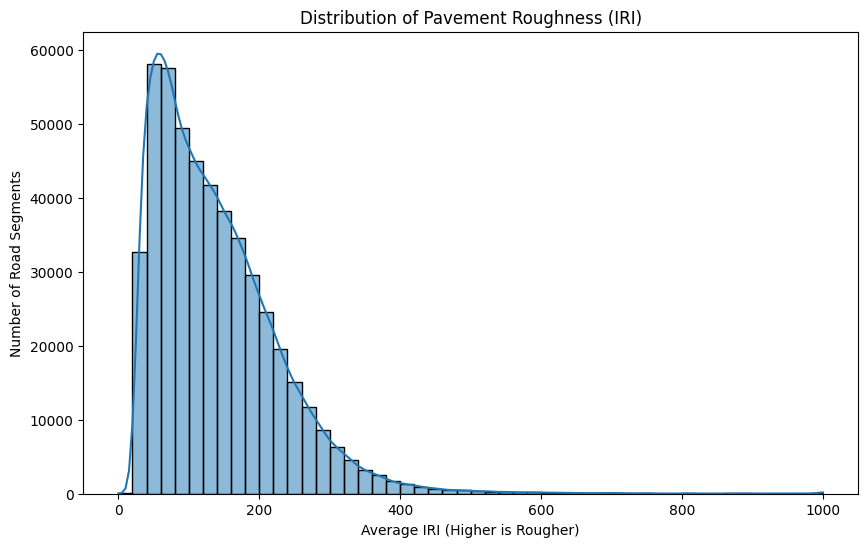

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(pavement_condition_master['average_iri'], bins=50, kde=True)

plt.title('Distribution of Pavement Roughness (IRI)')
plt.xlabel('Average IRI (Higher is Rougher)')
plt.ylabel('Number of Road Segments')
plt.show()

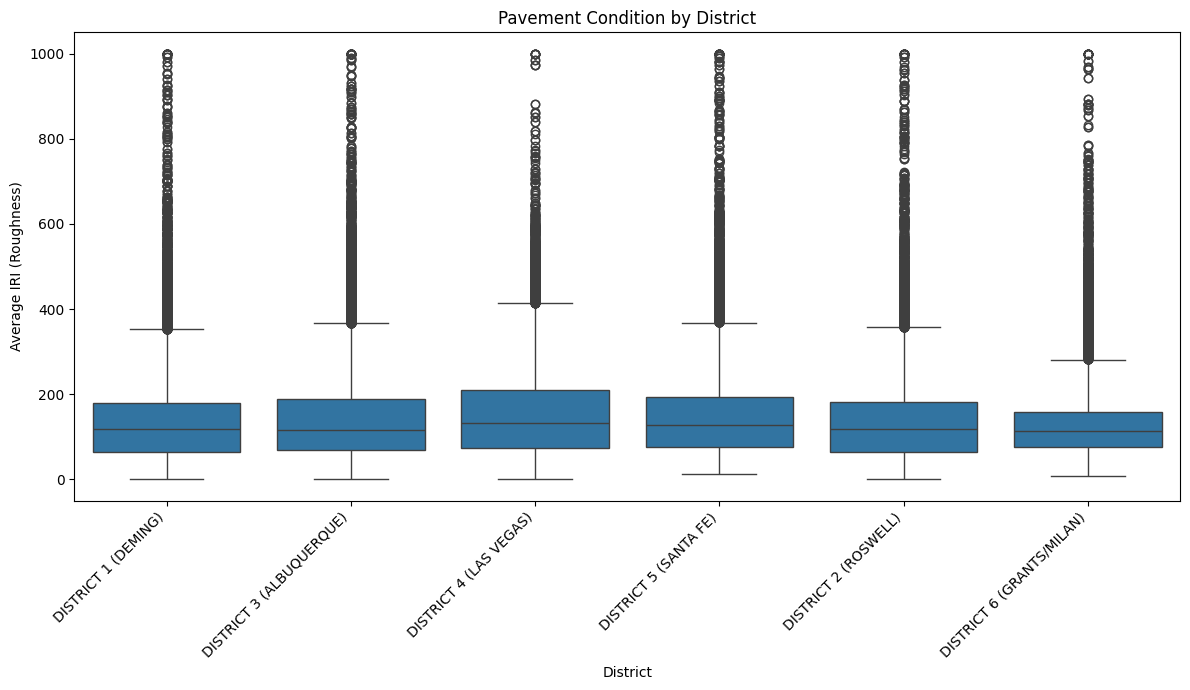

In [39]:
plt.figure(figsize=(12, 7))

# Create a box plot to compare IRI across districts
sns.boxplot(
    x='district', 
    y='average_iri', 
    data=pavement_condition_master
)

# Add titles and labels
plt.title('Pavement Condition by District')
plt.xlabel('District')
plt.ylabel('Average IRI (Roughness)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()



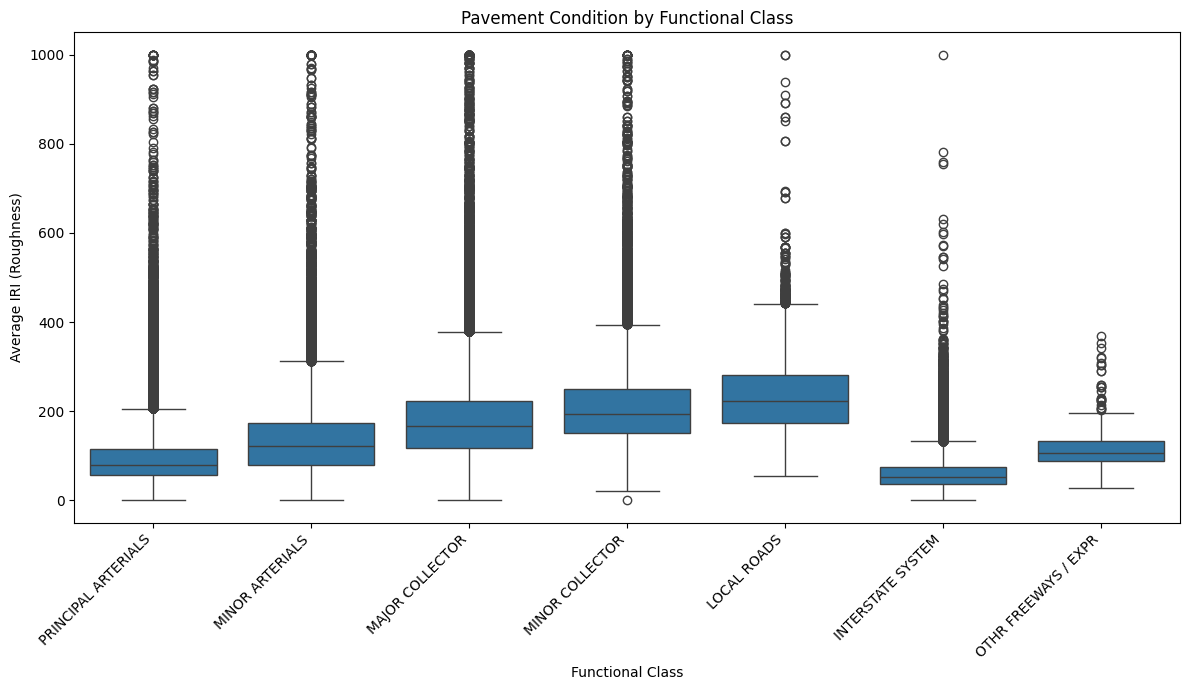

In [40]:
plt.figure(figsize=(12, 7))

# Create a box plot to compare IRI across functional class
sns.boxplot(
    x='nm_funct_class_name', 
    y='average_iri', 
    data=pavement_condition_master
)

# Add titles and labels
plt.title('Pavement Condition by Functional Class')
plt.xlabel('Functional Class')
plt.ylabel('Average IRI (Roughness)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

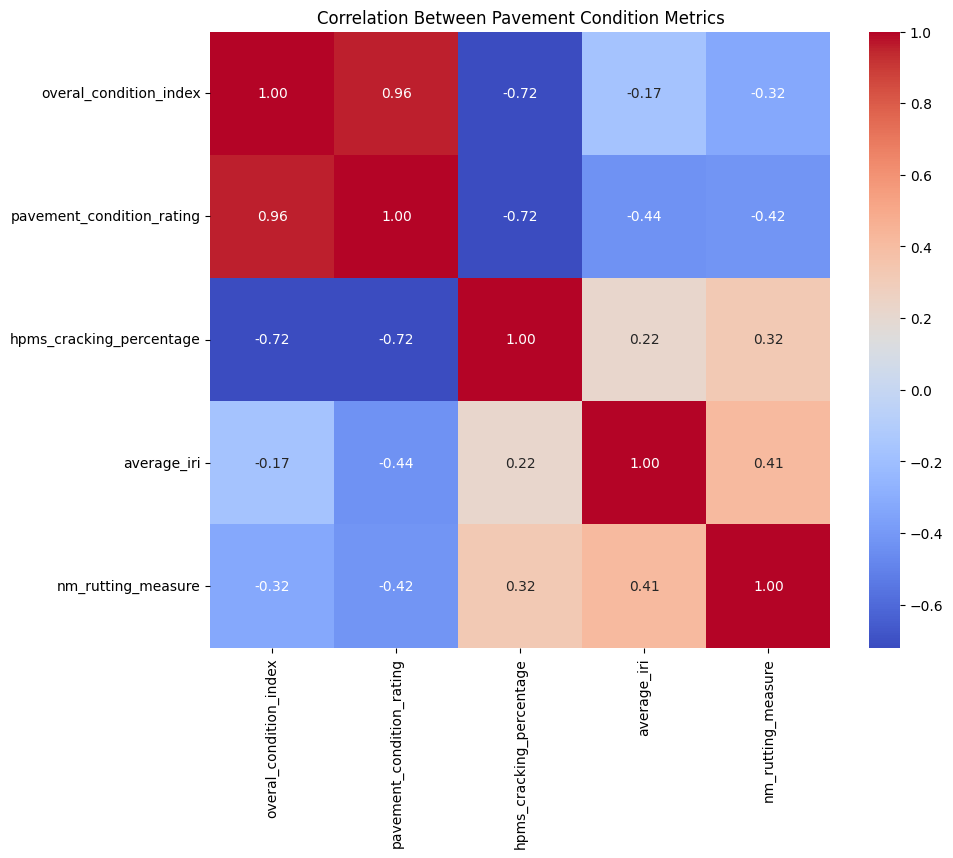

In [41]:
# Select the numeric condition columns you want to compare
condition_metrics = pavement_condition_master[[
    'overal_condition_index',
    'pavement_condition_rating',
    'hpms_cracking_percentage',
    'average_iri',
    'nm_rutting_measure'
]]

# Calculate the correlation matrix
correlation_matrix = condition_metrics.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, # Show the correlation values on the map
    cmap='coolwarm', # Use a color scheme that highlights positive/negative correlations
    fmt='.2f' # Format numbers to two decimal places
)
plt.title('Correlation Between Pavement Condition Metrics')
plt.show()

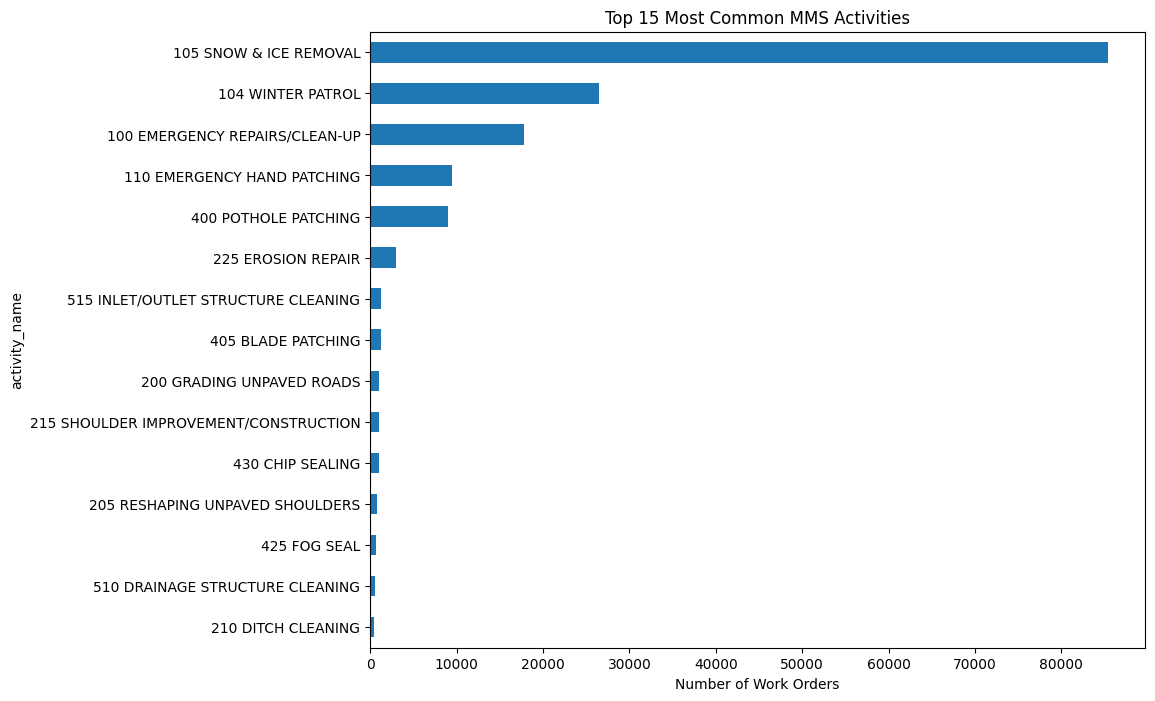

In [42]:
plt.figure(figsize=(10, 8))
mms_master['activity_name'].value_counts().head(15).plot(kind='barh').invert_yaxis()
plt.title('Top 15 Most Common MMS Activities')
plt.xlabel('Number of Work Orders')
plt.show()

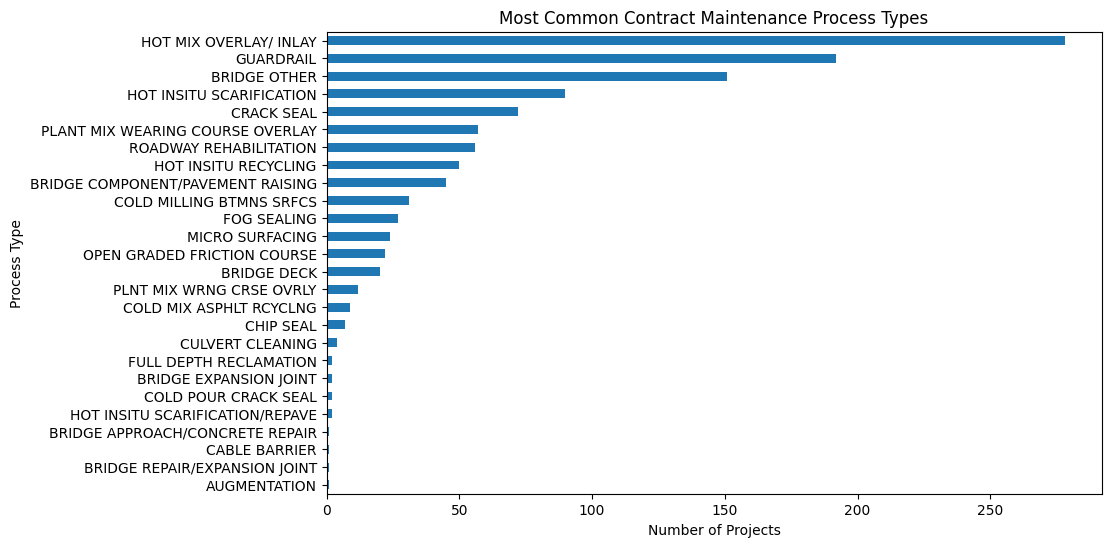

In [43]:
plt.figure(figsize=(10, 6))
contract_data['Process Type'].value_counts().plot(kind='barh').invert_yaxis()
plt.title('Most Common Contract Maintenance Process Types')
plt.xlabel('Number of Projects')
plt.show()

## Pavement Condition Data 2022

In [44]:
df = pd.read_csv("../data/raw/01_Pavement condition/Pavement_Condition_Data_2022.csv") 
df.head()

,year,route_name,direction,district,begin_mile,end_mile,length,lane_miles,latitude,longitude,divided_undivided,nhs,nm_funct_class_name,overal_condition_index,pavement_condition_rating,hpms_cracking_percentage,average_iri,nm_rutting_measure
0,2022,BL11M,M,DISTRICT 1 (DEMING),0.0000,0.1000,0.1000,0.1000,33.1134,-107.2995,Divided,1,PRINCIPAL ARTERIALS,30,37.00120,13.0,170.0,0.17
1,2022,BL11M,M,DISTRICT 1 (DEMING),0.1000,0.1209,0.0209,0.0209,33.1136,-107.2991,Divided,1,PRINCIPAL ARTERIALS,40,40.67368,21.6,238.0,0.25
2,2022,BL11M,M,DISTRICT 1 (DEMING),0.1759,0.2000,0.0241,0.0241,33.1141,-107.2979,Divided,1,PRINCIPAL ARTERIALS,84,81.28308,0.0,153.0,0.15
3,2022,BL11M,M,DISTRICT 1 (DEMING),0.2000,0.3000,0.1000,0.1000,33.1148,-107.2964,Divided,1,PRINCIPAL ARTERIALS,63,66.64684,0.1,119.0,0.20
4,2022,BL11M,M,DISTRICT 1 (DEMING),0.3000,0.4000,0.1000,0.2000,33.1155,-107.2949,Divided,1,PRINCIPAL ARTERIALS,68,72.11056,0.2,96.0,0.15


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144944 entries, 0 to 144943
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       144944 non-null  int64  
 1   route_name                 144944 non-null  object 
 2   direction                  144944 non-null  object 
 3   district                   144944 non-null  object 
 4   begin_mile                 144944 non-null  float64
 5   end_mile                   144944 non-null  float64
 6   length                     144944 non-null  float64
 7   lane_miles                 144935 non-null  float64
 8   latitude                   144944 non-null  float64
 9   longitude                  144944 non-null  float64
 10  divided_undivided          144944 non-null  object 
 11  nhs                        144944 non-null  int64  
 12  nm_funct_class_name        144944 non-null  object 
 13  overal_condition_index     14

In [46]:
df.describe()

,year,begin_mile,end_mile,length,lane_miles,latitude,longitude,nhs,overal_condition_index,pavement_condition_rating,hpms_cracking_percentage,average_iri,nm_rutting_measure
count,144944.000000,144944.000000,144944.000000,144944.000000,144935.000000,144944.000000,144944.000000,144944.000000,144944.000000,144932.000000,144944.000000,144822.000000,144944.000000
mean,2021.623082,87.604519,87.702999,0.098480,0.194278,34.545532,-105.877284,0.390772,63.413787,65.908038,5.829609,133.320759,0.190421
std,0.484616,113.856308,113.856528,0.010105,0.043179,1.456675,1.705614,0.487925,21.131810,18.273058,8.859866,85.487640,0.098858
min,2021.000000,0.000000,0.001000,0.000100,0.000200,31.336100,-109.049300,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2021.000000,8.500000,8.600000,0.100000,0.200000,33.262175,-107.189425,0.000000,46.000000,52.883240,0.100000,67.000000,0.120000
50%,2022.000000,32.200000,32.300000,0.100000,0.200000,34.762750,-105.953100,0.000000,68.000000,68.037920,2.200000,115.000000,0.170000
75%,2022.000000,126.000000,126.100000,0.100000,0.200000,35.695900,-104.411300,1.000000,83.000000,82.400000,7.800000,181.000000,0.240000
max,2022.000000,461.700000,461.738300,0.103200,0.600000,37.000200,-103.002300,1.000000,100.000000,100.000000,77.300000,1000.000000,1.500000


In [47]:
df.isnull().sum()

year                           0
route_name                     0
direction                      0
district                       0
begin_mile                     0
end_mile                       0
length                         0
lane_miles                     9
latitude                       0
longitude                      0
divided_undivided              0
nhs                            0
nm_funct_class_name            0
overal_condition_index         0
pavement_condition_rating     12
hpms_cracking_percentage       0
average_iri                  122
nm_rutting_measure             0
dtype: int64

In [48]:
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include=np.number).columns.tolist()

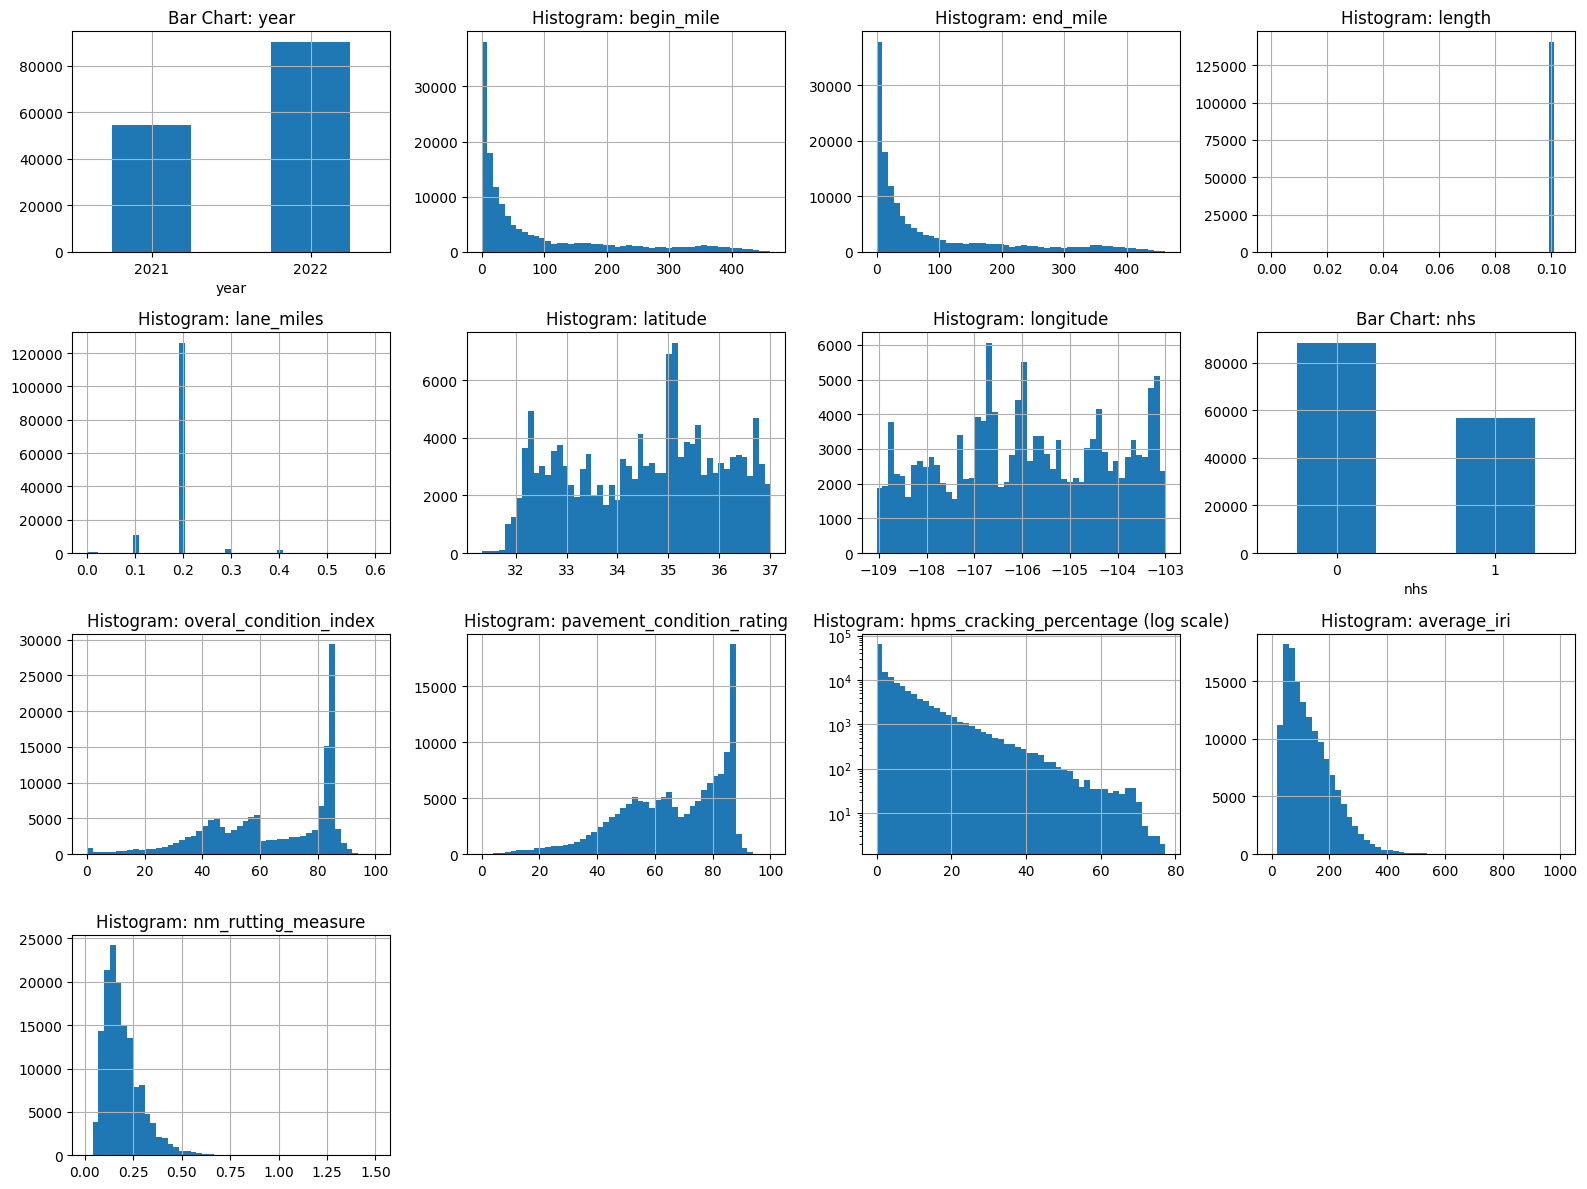

In [49]:
numerical_cols = df[numerical].columns 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12)) 

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    if df[col].nunique() < 5:
        df[col].value_counts().sort_index().plot(kind='bar', ax=ax, rot=0)
        ax.set_title(f'Bar Chart: {col}')
    else:
        if df[col].skew() > 2:
            ax.hist(df[col], bins=50)
            ax.set_yscale('log') 
            ax.set_title(f'Histogram: {col} (log scale)')
        else:
            ax.hist(df[col], bins=50)
            ax.set_title(f'Histogram: {col}')
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [50]:
print(f"Shape before dropping NaNs: {df.shape}")

# Drop rows where any of these specific columns are null
df.dropna(subset=['lane_miles', 'pavement_condition_rating'], inplace=True)

print(f"Shape after dropping NaNs: {df.shape}")

Shape before dropping NaNs: (144944, 18)
Shape after dropping NaNs: (144923, 18)


In [51]:
print(f"Missing 'average_iri' before imputing: {df['average_iri'].isnull().sum()}")
median_iri = df['average_iri'].median()

df['average_iri'] = df['average_iri'].fillna(median_iri)

print(f"Missing 'average_iri' after: {df['average_iri'].isnull().sum()}")

Missing 'average_iri' before imputing: 122
Missing 'average_iri' after: 0


In [52]:
print(f"Shape before filtering: {df.shape}")

# Define a more accurate bounding box for the contiguous U.S.
lat_min, lat_max = 24.5, 49.5
lon_min, lon_max = -125.0, -66.9

# Apply the accurate U.S. filter
df = df[(df['latitude'].between(lat_min, lat_max)) & 
        (df['longitude'].between(lon_min, lon_max))]

print(f"Shape after U.S. filtering: {df.shape}")

Shape before filtering: (144923, 18)
Shape after U.S. filtering: (144923, 18)


In [53]:
df.rename(columns={'overal_condition_index': 'overall_condition_index'}, inplace=True)


In [54]:
df.describe()

,year,begin_mile,end_mile,length,lane_miles,latitude,longitude,nhs,overall_condition_index,pavement_condition_rating,hpms_cracking_percentage,average_iri,nm_rutting_measure
count,144923.000000,144923.000000,144923.000000,144923.000000,144923.000000,144923.000000,144923.000000,144923.000000,144923.000000,144923.000000,144923.000000,144923.000000,144923.000000
mean,2021.623110,87.609947,87.708428,0.098481,0.194279,34.545423,-105.877506,0.390766,63.414282,65.909145,5.828967,133.303920,0.190419
std,0.484609,113.858426,113.858645,0.010103,0.043179,1.456615,1.705518,0.487924,21.132204,18.272710,8.859914,85.454207,0.098863
min,2021.000000,0.000000,0.001000,0.000100,0.000200,31.336100,-109.049300,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2021.000000,8.500000,8.600000,0.100000,0.200000,33.262050,-107.189550,0.000000,46.000000,52.883240,0.100000,67.000000,0.120000
50%,2022.000000,32.200000,32.300000,0.100000,0.200000,34.762600,-105.953300,0.000000,68.000000,68.046280,2.200000,115.000000,0.170000
75%,2022.000000,126.000000,126.100000,0.100000,0.200000,35.695500,-104.411600,1.000000,83.000000,82.400000,7.800000,181.000000,0.240000
max,2022.000000,461.700000,461.738300,0.103200,0.600000,37.000200,-103.002300,1.000000,100.000000,100.000000,77.300000,1000.000000,1.500000


## Pavement Condition Data 2020

In [55]:
df = pd.read_csv("../data/raw/01_Pavement condition/Pavement_Condition_Data_2020.csv")  # or use .read_excel if needed
df.head()


,year,route_name,direction,district,begin_mile,end_mile,length,lane_miles,latitude,longitude,divided_undivided,nhs,nm_funct_class_name,overal_condition_index,pavement_condition_rating,hpms_cracking_percentage,average_iri,nm_rutting_measure
0,2020,BL11M,M,DISTRICT 1 (DEMING),0.000,0.100,0.100,0.100,33.1134,-107.2996,Divided,1,PRINCIPAL ARTERIALS,68.0,69.75588,6.5,133.0,0.17
1,2020,BL11M,M,DISTRICT 1 (DEMING),0.100,0.132,0.032,0.032,33.1136,-107.2991,Divided,1,PRINCIPAL ARTERIALS,72.0,67.41920,10.7,220.0,0.18
2,2020,BL11M,M,DISTRICT 1 (DEMING),0.187,0.200,0.013,0.013,33.1140,-107.2981,Divided,1,PRINCIPAL ARTERIALS,85.0,81.82852,0.0,157.0,0.12
3,2020,BL11M,M,DISTRICT 1 (DEMING),0.200,0.300,0.100,0.100,33.1147,-107.2966,Divided,1,PRINCIPAL ARTERIALS,84.0,83.82868,0.0,113.0,0.16
4,2020,BL11M,M,DISTRICT 1 (DEMING),0.300,0.400,0.100,0.200,33.1154,-107.2950,Divided,1,PRINCIPAL ARTERIALS,84.0,85.16512,0.4,92.0,0.15


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173040 entries, 0 to 173039
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       173040 non-null  int64  
 1   route_name                 173040 non-null  object 
 2   direction                  173040 non-null  object 
 3   district                   173040 non-null  object 
 4   begin_mile                 173040 non-null  float64
 5   end_mile                   173040 non-null  float64
 6   length                     173040 non-null  float64
 7   lane_miles                 173034 non-null  float64
 8   latitude                   173040 non-null  float64
 9   longitude                  173040 non-null  float64
 10  divided_undivided          173040 non-null  object 
 11  nhs                        173040 non-null  int64  
 12  nm_funct_class_name        173040 non-null  object 
 13  overal_condition_index     17

In [57]:
df.describe()

,year,begin_mile,end_mile,length,lane_miles,latitude,longitude,nhs,overal_condition_index,pavement_condition_rating,hpms_cracking_percentage,average_iri,nm_rutting_measure
count,173040.000000,173040.000000,173040.000000,173040.000000,173034.000000,173040.000000,173040.000000,173040.000000,173040.000000,173032.000000,173040.000000,172791.000000,173035.000000
mean,2019.645284,72.155139,72.253001,0.097862,0.199144,34.566435,-105.308807,0.315020,73.527462,73.541897,6.616936,142.161750,0.180141
std,0.478428,106.405300,106.405802,0.011869,0.047404,3.976793,9.406826,0.464525,17.728800,16.045826,9.897398,92.521978,0.089890
min,2019.000000,0.000000,0.001000,0.000100,0.000200,-43.453900,-204.628700,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000
25%,2019.000000,4.200000,4.300000,0.100000,0.200000,33.304600,-106.955850,0.000000,69.000000,68.646600,0.400000,73.000000,0.120000
50%,2020.000000,20.700000,20.800000,0.100000,0.200000,34.973300,-105.994200,0.000000,82.000000,79.083000,2.800000,124.000000,0.160000
75%,2020.000000,88.200000,88.300000,0.100000,0.200000,35.688700,-104.380075,1.000000,84.000000,84.800000,8.700000,189.000000,0.220000
max,2020.000000,461.700000,461.738000,0.130000,0.600000,70.706700,25.033200,1.000000,100.000000,100.000000,79.100000,1000.000000,1.350000


In [58]:
df.isnull().sum()

year                           0
route_name                     0
direction                      0
district                       0
begin_mile                     0
end_mile                       0
length                         0
lane_miles                     6
latitude                       0
longitude                      0
divided_undivided              0
nhs                            0
nm_funct_class_name            0
overal_condition_index         0
pavement_condition_rating      8
hpms_cracking_percentage       0
average_iri                  249
nm_rutting_measure             5
dtype: int64

In [59]:
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include=np.number).columns.tolist()

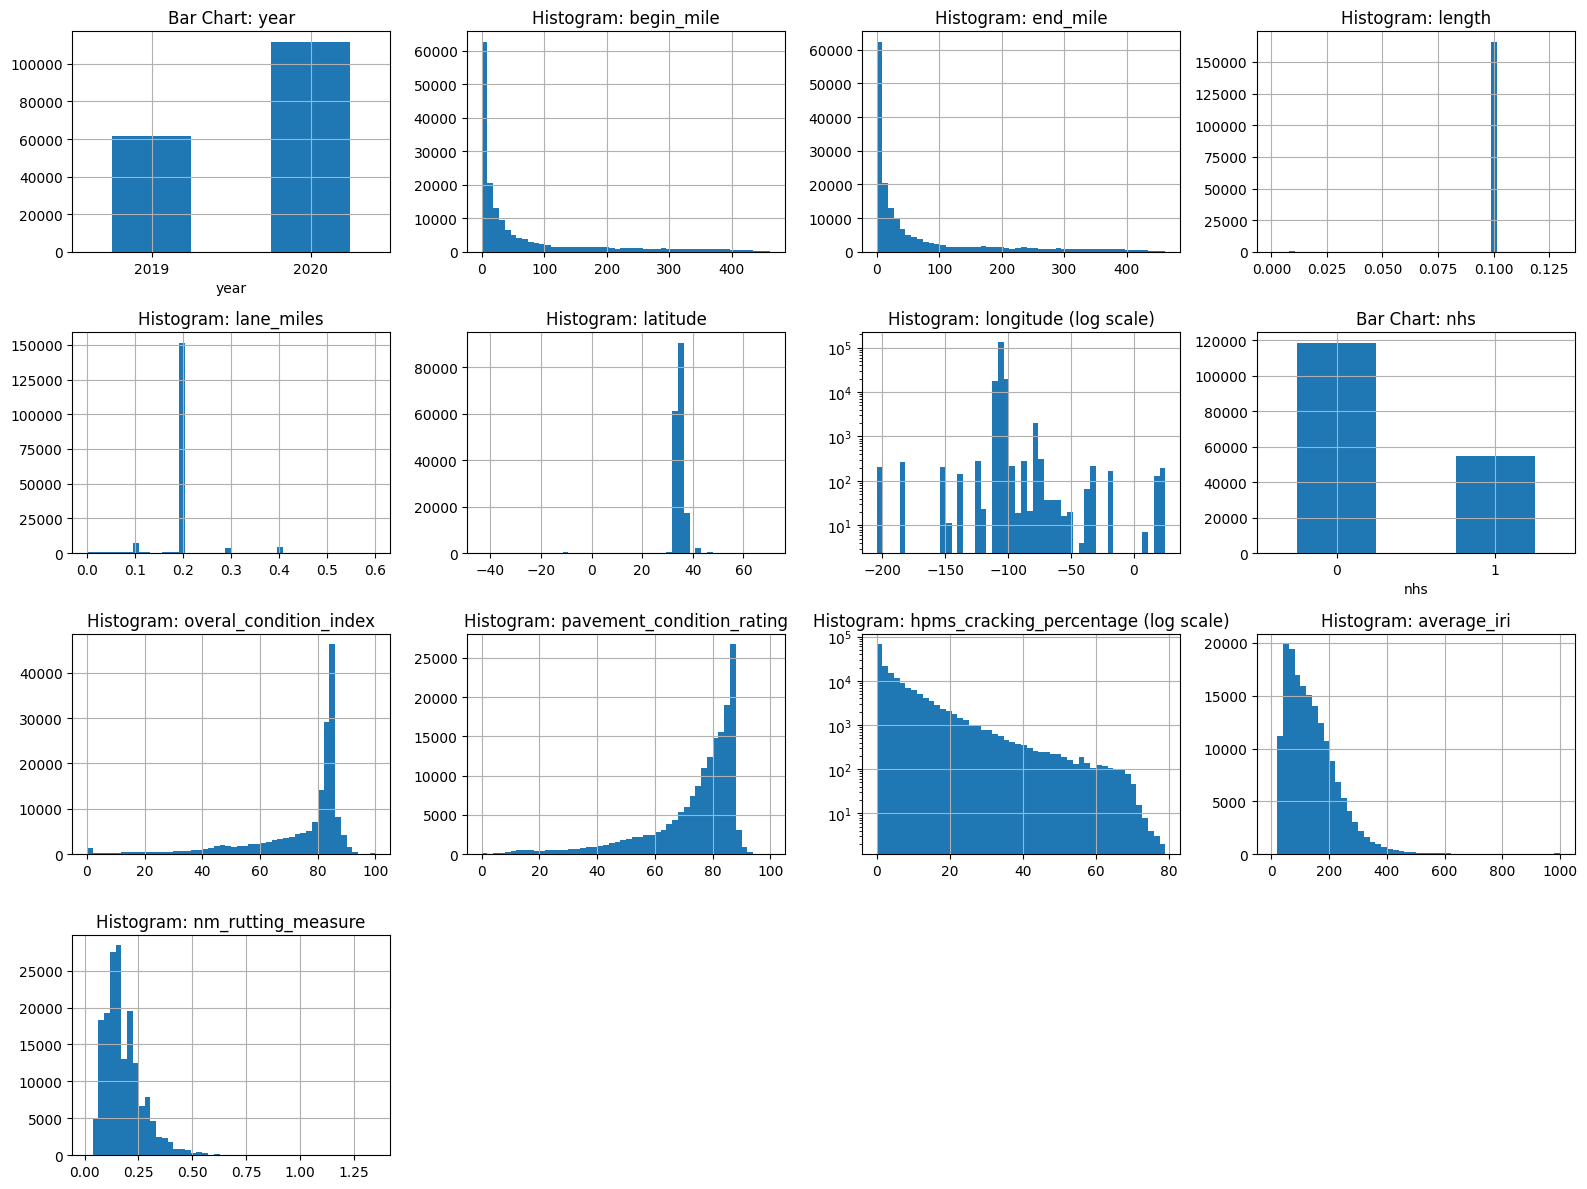

In [60]:
numerical_cols = df[numerical].columns 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12)) 

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    if df[col].nunique() < 5:
        df[col].value_counts().sort_index().plot(kind='bar', ax=ax, rot=0)
        ax.set_title(f'Bar Chart: {col}')
    else:
        if df[col].skew() > 2:
            ax.hist(df[col], bins=50)
            ax.set_yscale('log') 
            ax.set_title(f'Histogram: {col} (log scale)')
        else:
            ax.hist(df[col], bins=50)
            ax.set_title(f'Histogram: {col}')
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Dropping rows where there are NaNs

In [61]:
print(f"Shape before dropping NaNs: {df.shape}")

# Drop rows where any of these specific columns are null
df.dropna(subset=['lane_miles', 'pavement_condition_rating', 'nm_rutting_measure'], inplace=True)

print(f"Shape after dropping NaNs: {df.shape}")

Shape before dropping NaNs: (173040, 18)
Shape after dropping NaNs: (173021, 18)


for average_iri, impute missing values

In [62]:
print(f"Missing 'average_iri' before imputing: {df['average_iri'].isnull().sum()}")
median_iri = df['average_iri'].median()

df['average_iri'] = df['average_iri'].fillna(median_iri)

print(f"Missing 'average_iri' after: {df['average_iri'].isnull().sum()}")

Missing 'average_iri' before imputing: 249
Missing 'average_iri' after: 0


filtering invalid latitude and longitude

In [63]:
print(f"Shape before filtering: {df.shape}")

# Define a more accurate bounding box for the contiguous U.S.
lat_min, lat_max = 24.5, 49.5
lon_min, lon_max = -125.0, -66.9

# Apply the accurate U.S. filter
df = df[(df['latitude'].between(lat_min, lat_max)) & 
        (df['longitude'].between(lon_min, lon_max))]

print(f"Shape after U.S. filtering: {df.shape}")

Shape before filtering: (173021, 18)
Shape after U.S. filtering: (170550, 18)


In [64]:
df.rename(columns={'overal_condition_index': 'overall_condition_index'}, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170550 entries, 0 to 173039
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       170550 non-null  int64  
 1   route_name                 170550 non-null  object 
 2   direction                  170550 non-null  object 
 3   district                   170550 non-null  object 
 4   begin_mile                 170550 non-null  float64
 5   end_mile                   170550 non-null  float64
 6   length                     170550 non-null  float64
 7   lane_miles                 170550 non-null  float64
 8   latitude                   170550 non-null  float64
 9   longitude                  170550 non-null  float64
 10  divided_undivided          170550 non-null  object 
 11  nhs                        170550 non-null  int64  
 12  nm_funct_class_name        170550 non-null  object 
 13  overall_condition_index    170550 

In [66]:
df.describe()

,year,begin_mile,end_mile,length,lane_miles,latitude,longitude,nhs,overall_condition_index,pavement_condition_rating,hpms_cracking_percentage,average_iri,nm_rutting_measure
count,170550.000000,170550.000000,170550.000000,170550.000000,170550.000000,170550.000000,170550.000000,170550.000000,170550.000000,170550.000000,170550.000000,170550.000000,170550.000000
mean,2019.640158,72.458508,72.556368,0.097859,0.199214,34.694784,-105.507605,0.318429,73.451891,73.472987,6.661592,142.273826,0.180478
std,0.479955,106.977677,106.978183,0.011870,0.047631,1.768814,3.532805,0.465868,17.802282,16.109117,9.945067,92.828214,0.090196
min,2019.000000,0.000000,0.001000,0.000100,0.000200,31.788800,-118.223800,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000
25%,2019.000000,4.200000,4.300000,0.100000,0.200000,33.322025,-106.937100,0.000000,69.000000,68.467170,0.400000,72.000000,0.120000
50%,2020.000000,20.400000,20.500000,0.100000,0.200000,34.971300,-105.994800,0.000000,82.000000,79.019680,2.800000,124.000000,0.160000
75%,2020.000000,88.300000,88.400000,0.100000,0.200000,35.670500,-104.397700,1.000000,84.000000,84.800000,8.800000,189.000000,0.220000
max,2020.000000,461.700000,461.738000,0.130000,0.600000,48.700100,-68.794000,1.000000,100.000000,100.000000,79.100000,1000.000000,1.350000


In [67]:
print(f"Shape before filtering for year 2020: {df.shape}")

# Create a new DataFrame containing only data from the year 2020
df_2020 = df[df['year'] == 2020].copy()

print(f"Shape after filtering for year 2020: {df_2020.shape}")

Shape before filtering for year 2020: (170550, 18)
Shape after filtering for year 2020: (109179, 18)


In [68]:
df_2020.describe()

,year,begin_mile,end_mile,length,lane_miles,latitude,longitude,nhs,overall_condition_index,pavement_condition_rating,hpms_cracking_percentage,average_iri,nm_rutting_measure
count,109179.0,109179.000000,109179.000000,109179.000000,109179.000000,109179.000000,109179.000000,109179.000000,109179.000000,109179.000000,109179.000000,109179.000000,109179.000000
mean,2020.0,98.998792,99.096451,0.097659,0.196781,34.753982,-105.171818,0.497422,74.048013,74.781078,6.098047,128.142949,0.174819
std,0.0,122.391348,122.392099,0.012431,0.049462,1.930829,4.207137,0.499996,17.658199,16.011206,9.582796,92.740122,0.089328
min,2020.0,0.000000,0.001000,0.000200,0.000200,31.814100,-118.223800,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000
25%,2020.0,4.667450,4.702850,0.100000,0.200000,33.324700,-106.801550,0.000000,70.000000,70.455280,0.100000,61.000000,0.110000
50%,2020.0,35.500000,35.600000,0.100000,0.200000,34.986300,-105.907800,0.000000,82.000000,80.610360,2.200000,103.000000,0.150000
75%,2020.0,166.600000,166.700000,0.100000,0.200000,35.662600,-104.229100,1.000000,84.000000,85.610600,7.900000,171.000000,0.220000
max,2020.0,461.700000,461.738000,0.130000,0.600000,48.700100,-68.794000,1.000000,100.000000,100.000000,79.100000,1000.000000,1.350000


In [69]:
# Check if the calculation holds true for a sample of the data
# (It should be very close, allowing for floating point inaccuracies)
is_redundant = (abs((df_2020['end_mile'] - df_2020['begin_mile']) - df_2020['length']) < 0.001).all()

print(f"Is 'length' a redundant column? {is_redundant}")

if is_redundant:
    # If it is, we can drop it before training a model
    # df_2020.drop(columns=['length'], inplace=True)
    print("'length' can be dropped before machine learning.")

Is 'length' a redundant column? True
'length' can be dropped before machine learning.


In [70]:
numerical = df_2020.select_dtypes(include=np.number).columns.tolist() 

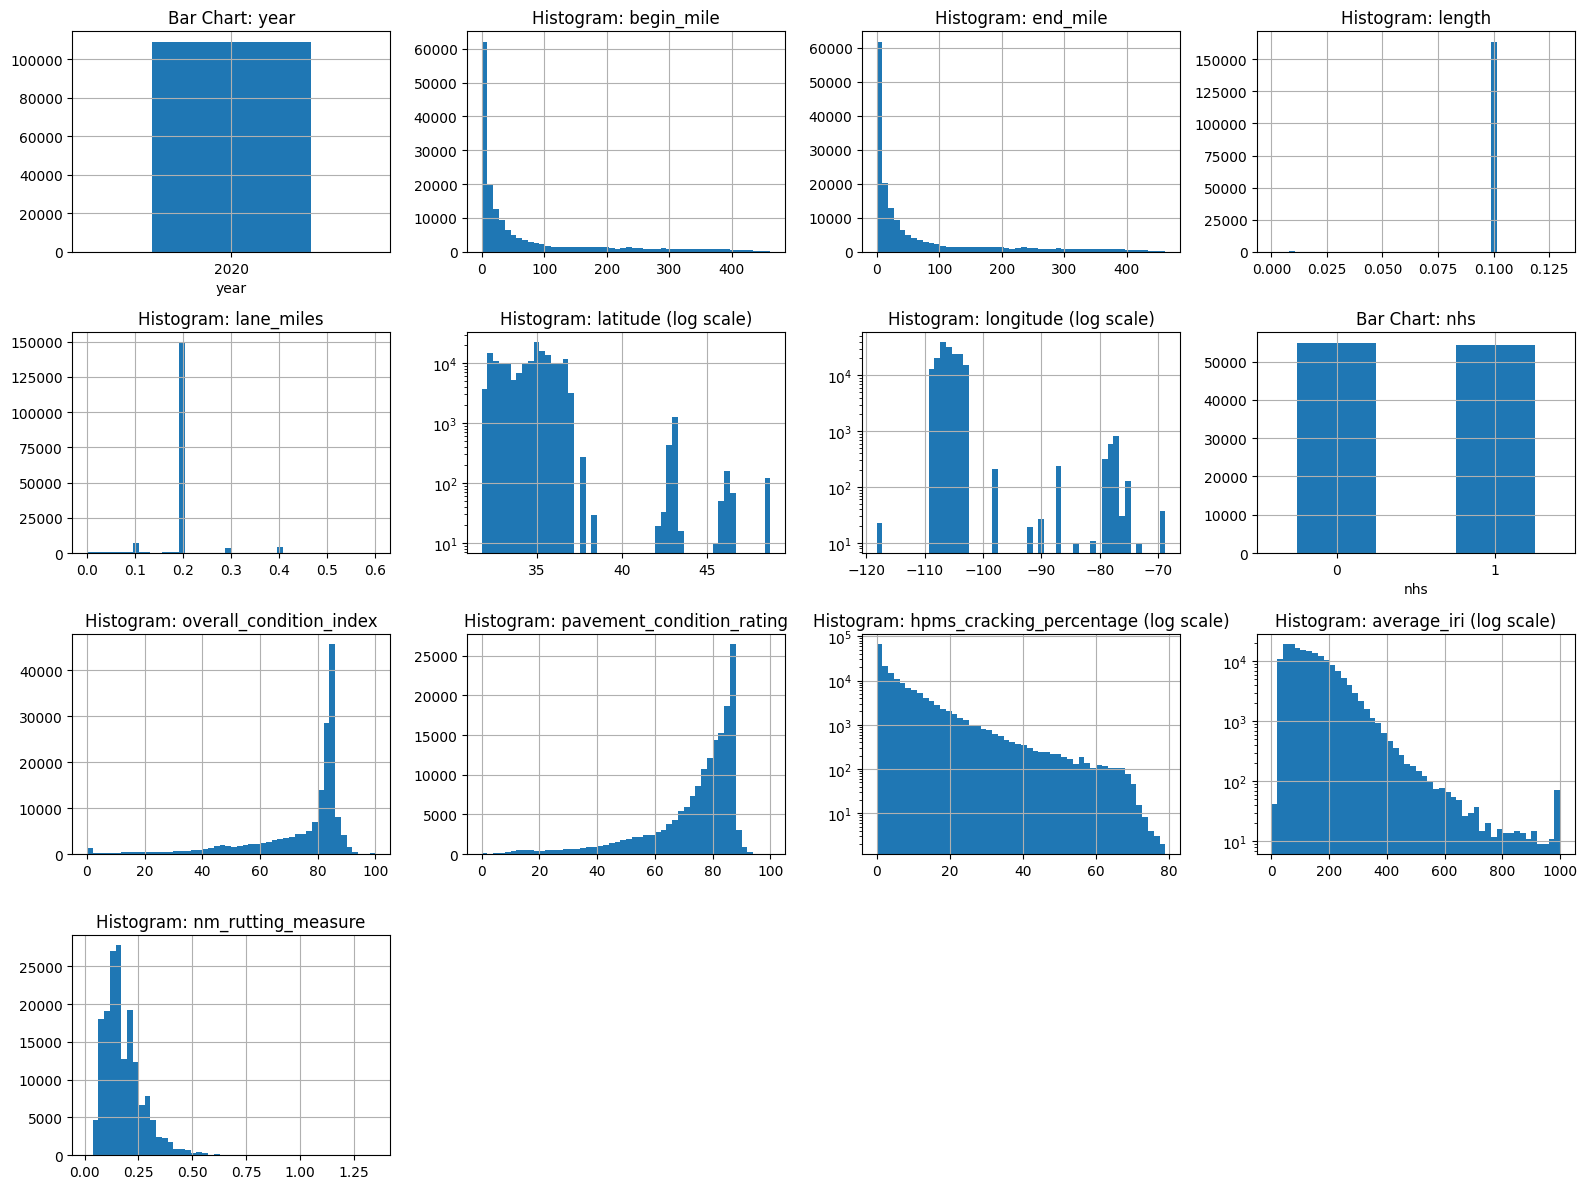

In [71]:
numerical_cols = df_2020[numerical].columns 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12)) 
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    if df_2020[col].nunique() < 5:
        df_2020[col].value_counts().sort_index().plot(kind='bar', ax=ax, rot=0)
        ax.set_title(f'Bar Chart: {col}')
    else:
        if df_2020[col].skew() > 2:
            ax.hist(df[col], bins=50)
            ax.set_yscale('log') 
            ax.set_title(f'Histogram: {col} (log scale)')
        else:
            ax.hist(df[col], bins=50)
            ax.set_title(f'Histogram: {col}')
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Pavement Condition Features (2020)')

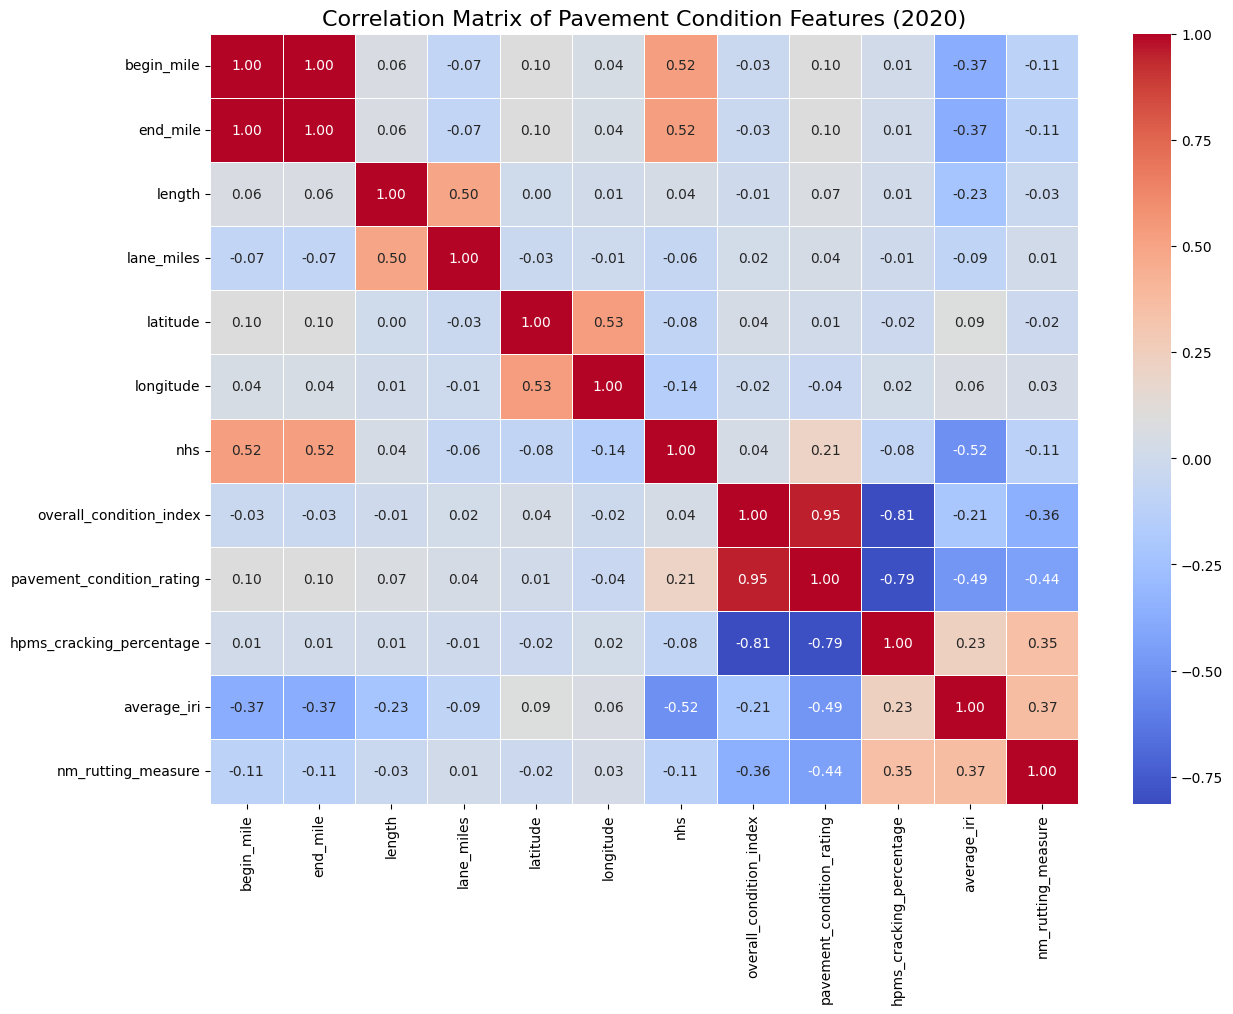

In [72]:
numerical_df = df_2020.select_dtypes(include=np.number)
correlation_matrix = numerical_df.drop(columns='year').corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=.5)

plt.title('Correlation Matrix of Pavement Condition Features (2020)', fontsize=16)


## Maintainance files

In [73]:
df_2016_2023 = pd.read_excel("../data/raw/02_Maintenance/2016-2023-ContractMaintenance.xlsx")
df_2016_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FY                1159 non-null   int64         
 1   NHS               1159 non-null   bool          
 2   District          1159 non-null   int64         
 3   Process Type      1159 non-null   object        
 4   Route Type        1159 non-null   object        
 5   Route             1159 non-null   object        
 6   Beg MM            1157 non-null   float64       
 7   End MM            1157 non-null   float64       
 8   Total Lane Miles  450 non-null    float64       
 9   Cost              1159 non-null   float64       
 10  Comments          489 non-null    object        
 11  Entry Date        1159 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 100.9+ KB


In [74]:
df_2021 = pd.read_excel("../data/raw/02_Maintenance/2021 MMS.xlsx")
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60387 entries, 0 to 60386
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fiscal_year          60387 non-null  int64         
 1   district             60387 non-null  int64         
 2   activity_name        60387 non-null  object        
 3   comment_work_order   47409 non-null  object        
 4   route_name           60387 non-null  object        
 5   eff_offset_from      60387 non-null  float64       
 6   eff_offset_from.1    60387 non-null  float64       
 7   amount               60377 non-null  float64       
 8   comment_location     39285 non-null  object        
 9   total_cost           60387 non-null  float64       
 10  start_date           60387 non-null  datetime64[ns]
 11  nm_nhs               60387 non-null  int64         
 12  nm_locale_code_name  60387 non-null  object        
 13  nm_funct_class_name  60387 non-

In [75]:
df_2022 = pd.read_excel("../data/raw/02_Maintenance/2022 MMS.xlsx")
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62897 entries, 0 to 62896
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fiscal_year          62897 non-null  int64         
 1   district             62897 non-null  int64         
 2   activity_name        62897 non-null  object        
 3   comment_work_order   50574 non-null  object        
 4   route_name           62897 non-null  object        
 5   eff_offset_from      62897 non-null  float64       
 6   eff_offset_from.1    62897 non-null  float64       
 7   amount               60832 non-null  float64       
 8   comment_location     42177 non-null  object        
 9   total_cost           62897 non-null  float64       
 10  start_date           62897 non-null  datetime64[ns]
 11  nm_nhs               62897 non-null  int64         
 12  nm_locale_code_name  62897 non-null  object        
 13  nm_funct_class_name  62897 non-

In [76]:
df_2023 = pd.read_excel("../data/raw/02_Maintenance/2023 MMS.xlsx")
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38184 entries, 0 to 38183
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fiscal_year          38184 non-null  int64         
 1   district             38184 non-null  int64         
 2   activity_name        38184 non-null  object        
 3   comment_work_order   29801 non-null  object        
 4   route_name           38184 non-null  object        
 5   eff_offset_from      38184 non-null  float64       
 6   eff_offset_from.1    38184 non-null  float64       
 7   amount               31786 non-null  float64       
 8   comment_location     23903 non-null  object        
 9   total_cost           38184 non-null  float64       
 10  start_date           38184 non-null  datetime64[ns]
 11  nm_nhs               38184 non-null  int64         
 12  nm_locale_code_name  38184 non-null  object        
 13  nm_funct_class_name  38184 non-

## Merging Pavement Data and Maintanance Data